In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.133223,4.694731,15.367883,15.499120,15.591609
1,49.266143,0.157743,10.636686,8.036980,24.752570
2,59.508673,21.953702,7.837912,8.184207,23.958122
3,49.508475,3.255119,8.499133,10.672777,22.089755
4,56.119906,11.999331,11.869501,4.978250,18.146494


<Axes: ylabel='Density'>

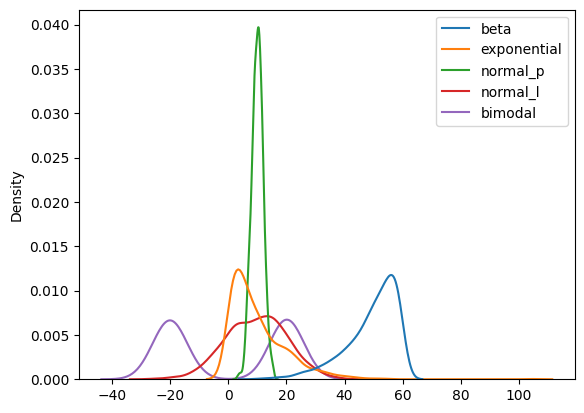

In [6]:
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.344694,10.225059,10.010969,9.639460,0.047671
std,8.951292,9.758259,1.973234,10.427204,20.342689
min,10.424803,0.008445,3.269274,-26.012463,-28.359661
25%,44.616222,3.069401,8.684316,2.502231,-20.036270
50%,51.721188,7.220318,10.056179,10.070139,0.042966
75%,56.205107,14.549022,11.384004,16.980462,20.034359
max,59.997536,104.107156,15.448042,38.288408,29.013582


<Axes: ylabel='Density'>

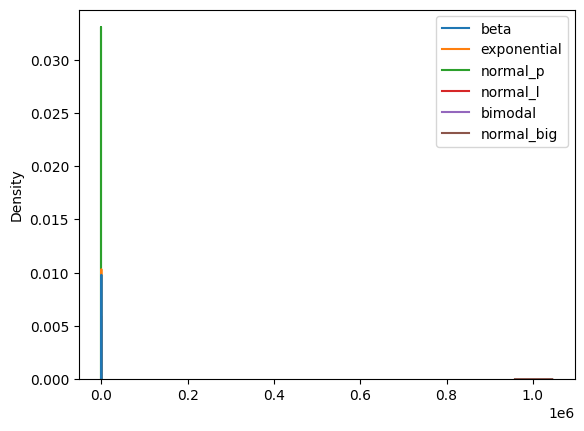

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

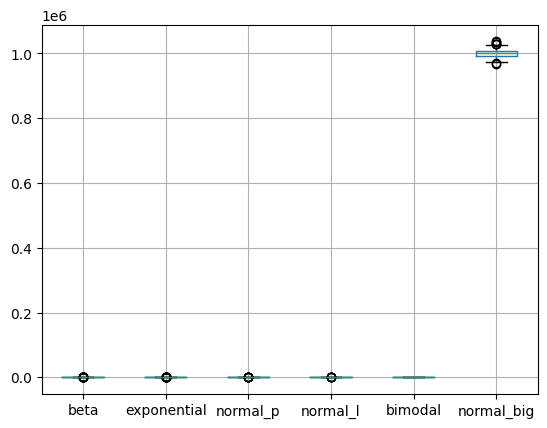

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.982308,-0.567017,2.716147,0.562240,0.764487,-1.130327
1,-0.008780,-1.032187,0.317261,-0.153760,1.215044,0.386053
2,1.136044,1.202521,-1.101818,-0.139633,1.175971,0.285080
3,0.018306,-0.714618,-0.766555,0.099148,1.084081,0.710059
4,0.757276,0.181914,0.942342,-0.447248,0.890142,-0.620406


<Axes: ylabel='Density'>

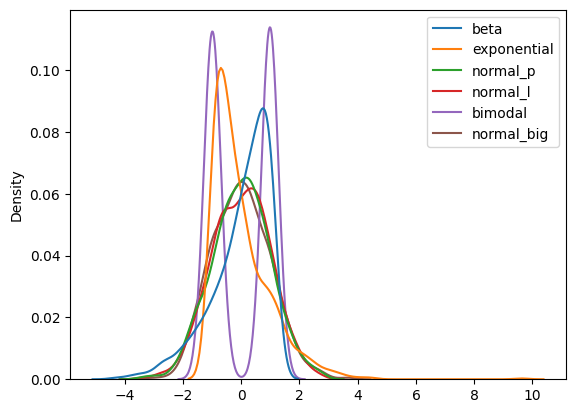

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,-4.263256e-17,8.171241e-17,4.831691e-16,4.263256e-17,0.000000,6.894041e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-4.350139e+00,-1.047495e+00,-3.418280e+00,-3.420837e+00,-1.397138,-3.410667e+00
25%,-5.285090e-01,-7.336593e-01,-6.726607e-01,-6.848241e-01,-0.987775,-7.258324e-01
50%,2.656246e-01,-3.080717e-01,2.292314e-02,4.132403e-02,-0.000231,-2.315342e-02
75%,7.667995e-01,4.433298e-01,6.961776e-01,7.043763e-01,0.982991,6.752926e-01
max,1.190685e+00,9.625597e+00,2.756790e+00,2.748894e+00,1.424610,3.681023e+00


<Axes: >

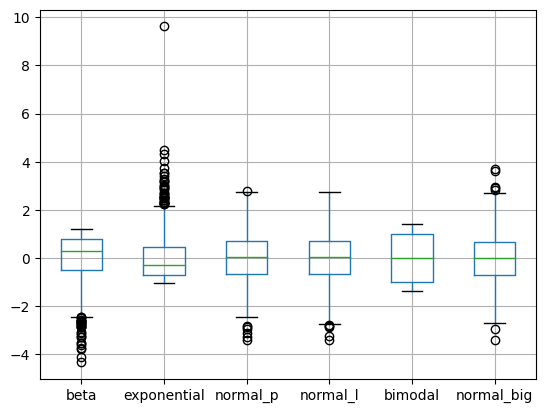

In [15]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()